# Exportações do Brasil para a França
Este projeto tem como objetivo analisar as exportações do Brasil para a França a partir de um arquivo chamado `exportacao_full.csv`, que contém dados de exportação do Brasil para diversos países.

### Importação das bibliotecas; Definição do tema;

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set_theme(style='dark', palette='bright', context='notebook')

### Puxar base de dados; 

In [4]:
df = pd.read_csv('./assets/exportacoes_franca.csv', sep=',')
display(df)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
...,...,...,...,...,...,...,...,...,...,...,...
142355,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400
142357,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400
142358,2020,12,France,Xapuri - AC,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,31111,23045


## Informações Gerais

### Quantas linhas têm a tabela? Existe algum valor vazio que deveria ser tratado?

A tabela tem 142.360 linhas

Não existe valores vazios a serem tratados

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142360 entries, 0 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             142360 non-null  int64 
 1   Month            142360 non-null  int64 
 2   Country          142360 non-null  object
 3   City             142360 non-null  object
 4   SH4 Code         142360 non-null  int64 
 5   SH4 Description  142360 non-null  object
 6   SH2 Code         142360 non-null  int64 
 7   SH2 Description  142360 non-null  object
 8   Economic Block   142360 non-null  object
 9   US$ FOB          142360 non-null  int64 
 10  Net Weight       142360 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.9+ MB


None

In [6]:
# Verificando se há valores vazios
valores_vazios = df.isnull().values.any()
print(f"O DataFrame tem valores vazios: {valores_vazios}")

O DataFrame tem valores vazios: False


## Como foi a evolução das exportações para a frança ao longo dos anos?

Crie uma tabela com os anos de 2016, 2017, 2018, 2019 e 2020 e o valor US$ de exportações

- Analisando o Gráfico, podemos notar que os melhores anos de exportação foram de 2018 e 2019, sendo que 2020 o pior ano dentre os 5, talvez isso tenha acontecido por conta da pandemia de covid, levando em consideração sua grande queda em total exportado: US$ -1.251.128.802 em relação ao ano anterior.

,Year,US$ FOB,US$ FOB Formatado
0,2016,4615500082,"US$ 4,615,500,082"
1,2017,4448705456,"US$ 4,448,705,456"
2,2018,5239424416,"US$ 5,239,424,416"
3,2019,5218723612,"US$ 5,218,723,612"
4,2020,3967594810,"US$ 3,967,594,810"


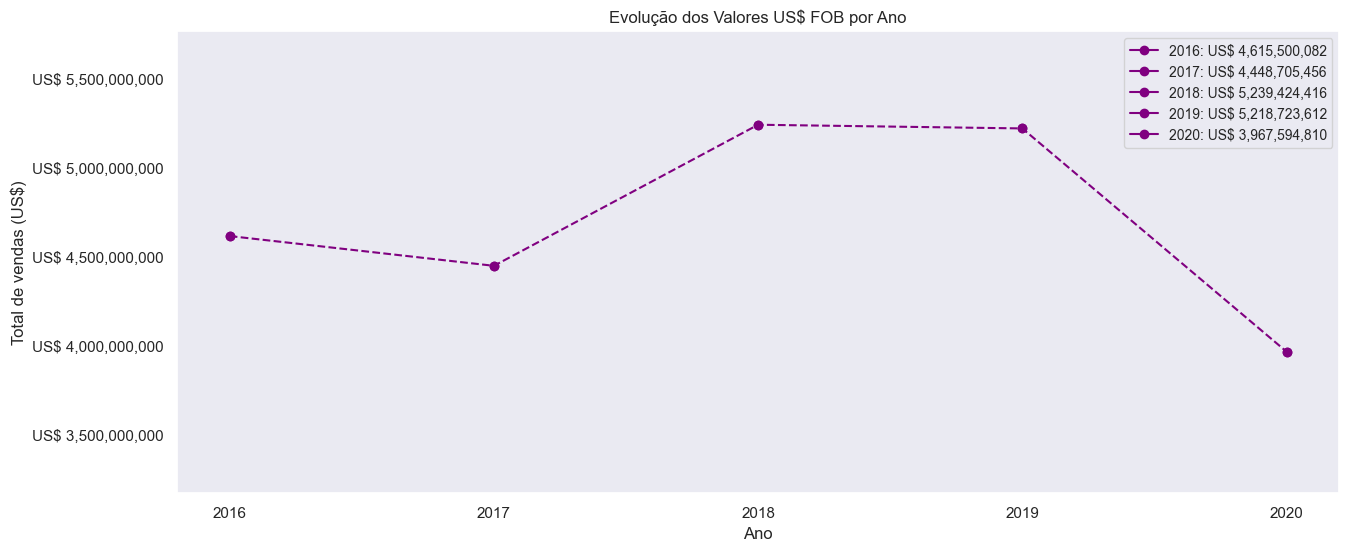

In [7]:
evolucao_df = df.groupby('Year')['US$ FOB'].sum().reset_index()
evolucao_df['US$ FOB Formatado'] = evolucao_df['US$ FOB'].map('US$ {:,}'.format)
display(evolucao_df)

plt.figure(figsize=(15, 6))
plot = plt.plot(evolucao_df['Year'], evolucao_df['US$ FOB'], color='purple', marker='o', linestyle='--')

for i, row in evolucao_df.iterrows():
    plt.plot(row['Year'], row['US$ FOB'], color='purple', marker='o', linestyle='-', label=f'{row["Year"]}: US$ {row["US$ FOB"]:,.0f}')
plt.legend(loc='best', fontsize=10)

plt.xticks(evolucao_df['Year'])
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'US$ {x:,.0f}'))

y_max = evolucao_df['US$ FOB'].max() * 1.1
y_min = evolucao_df['US$ FOB'].min() * 0.8
plt.ylim(y_min, y_max)

plt.xlabel('Ano')
plt.ylabel('Total de vendas (US$)')
plt.title('Evolução dos Valores US$ FOB por Ano')
plt.show()

## Quais os produtos mais exportados ao longo de todo o período?

Queremos saber os produtos com maior valor US$ de exportação

### Os 3 produtos mais exportados foram:

1 - Residues and waste from the food industries; others - US$ 5,641,498,484

2 - Ores, slag and ash - US$ 3,404,353,274

3 - Nuclear reactors, boilers, machinery and mechanical appliances; others - US$ 1,889,781,694

Isso nos mostra a grande diferença de exportação entre produtos e o quanto Resíduos e desperdícios das indústrias alimentares está a frente quando comparado a outros produtos

In [8]:
more_exported_products_df = df.groupby('SH2 Description')['US$ FOB'].sum().reset_index()
more_exported_products_df['US$ FOB Formatado'] = more_exported_products_df['US$ FOB'].map('US$ {:,}'.format)
more_exported_products_df = more_exported_products_df.sort_values(by='US$ FOB', ascending=False)

pd.set_option('display.max_colwidth', None)

more_exported_products_df = more_exported_products_df.head(5)
display(more_exported_products_df)

,SH2 Description,US$ FOB,US$ FOB Formatado
75,Residues and waste from the food industries; others,5641498484,"US$ 5,641,498,484"
57,"Ores, slag and ash",3404353274,"US$ 3,404,353,274"
54,"Nuclear reactors, boilers, machinery and mechanical appliances; others",1889781694,"US$ 1,889,781,694"
72,"Pulp of wood or of other fibrous cellulosic material, others,",1855424642,"US$ 1,855,424,642"
0,"Aircraft, spacecraft, and parts thereof",1253007710,"US$ 1,253,007,710"


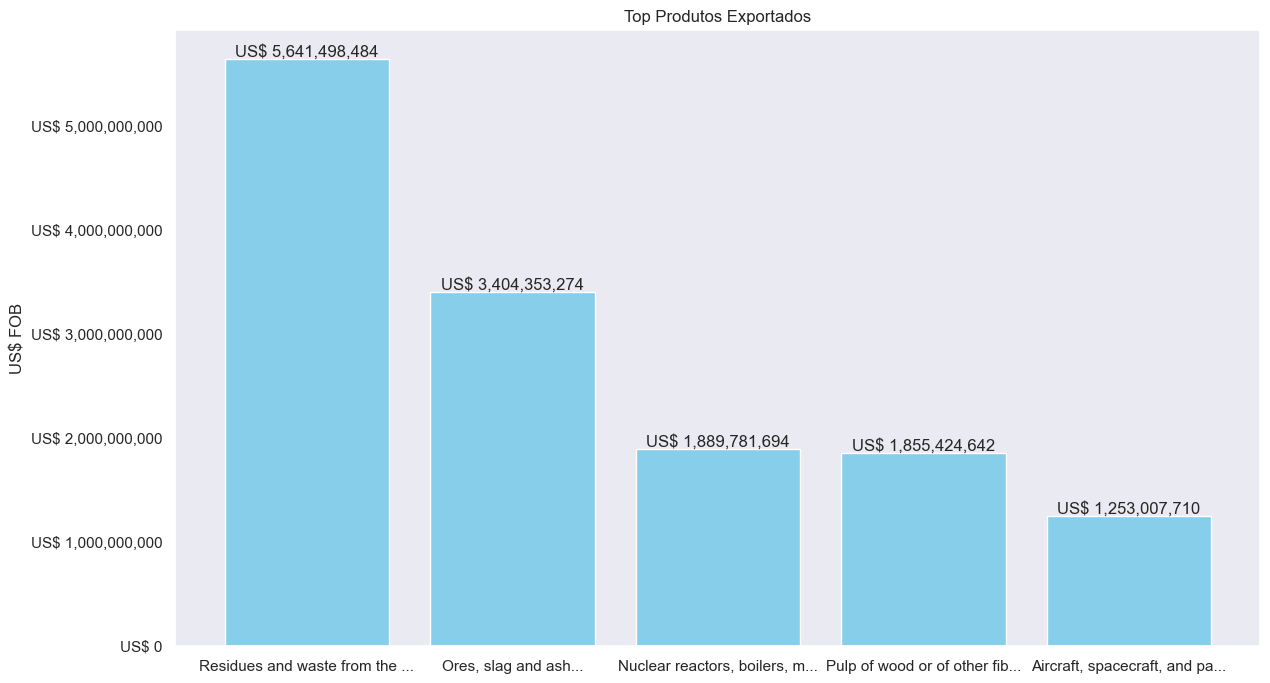

In [9]:
plt.figure(figsize=(14, 8))
bars = plt.bar(more_exported_products_df['SH2 Description'], more_exported_products_df['US$ FOB'], color='skyblue')

plt.ylabel('US$ FOB')
plt.title('Top Exported Products by Value')

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'US$ {x:,.0f}'))

xticks_labels = plt.gca().get_xticklabels()
xticks_labels_formatted = [f'{label.get_text()[:28]}...' for label in xticks_labels]
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels_formatted, ha='center')


for bar, value in zip(bars, more_exported_products_df['US$ FOB']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'US$ {value:,.0f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('')
plt.title('Top Produtos Exportados')
plt.show()

## Em 2020 qual cidade mais exportou para a França?
A cidade que mais exportou em 2020 foi Duque de Caxias - RJ => com:	US$ 279,405,596

- Duque de Caxias - RJ Exportou mais que o dobro da 5º cidade da lista de cidades que mais exportaram. A 5º cidade foi Rio de Janeiro - RJ com US$ 122,522,214

In [10]:
df_2020 = df[df['Year'] == 2020]
# OU #
# df_2020 = df.loc[df['Year'] == 2020, :]

cidade_mais_exportou_2020 = df_2020.groupby('City')['US$ FOB'].sum().reset_index()

cidade_mais_exportou_2020 = cidade_mais_exportou_2020.sort_values('US$ FOB', ascending=False)
cidade_mais_exportou_2020 = cidade_mais_exportou_2020.head(5) # 5 cidades que mais exportaram #

cidade_mais_exportou_2020['US$ FOB Formatado']= cidade_mais_exportou_2020['US$ FOB'].map('US$ {:,}'.format)

cidade_mais_exportou_2020

,City,US$ FOB,US$ FOB Formatado
180,Duque de Caxias - RJ,279405596,"US$ 279,405,596"
326,Luís Eduardo Magalhães - BA,265328132,"US$ 265,328,132"
456,Ponta Grossa - PR,187777016,"US$ 187,777,016"
576,São José dos Campos - SP,172939276,"US$ 172,939,276"
508,Rio de Janeiro - RJ,122522214,"US$ 122,522,214"


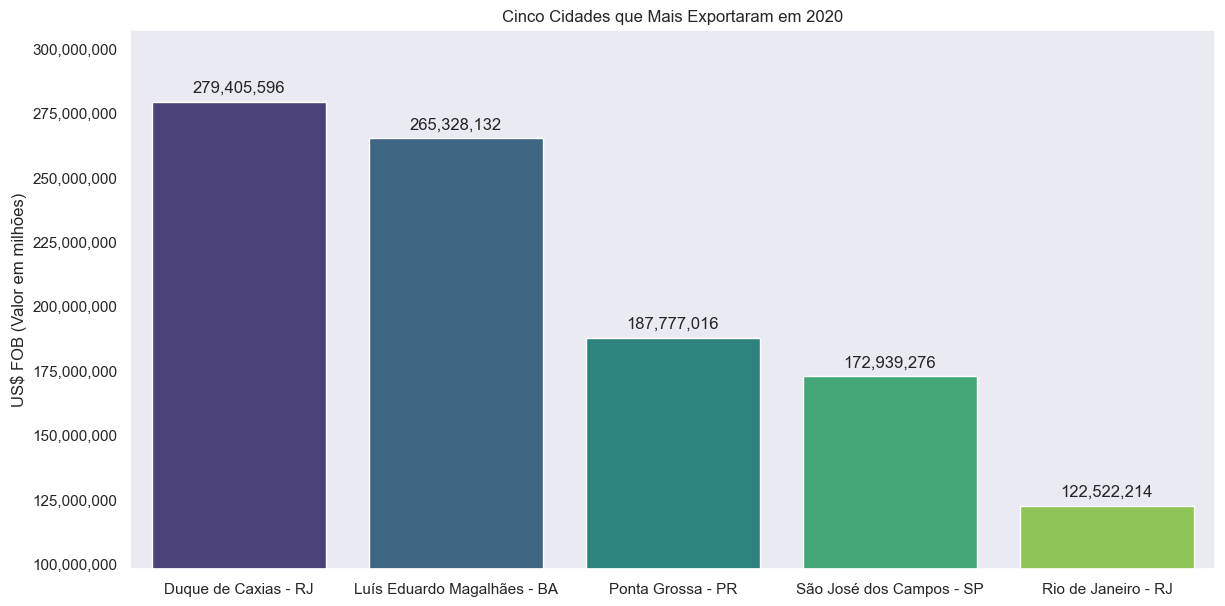

In [14]:
plt.figure(figsize=(14, 7))

ax = sns.barplot(x='City', y='US$ FOB', data=cidade_mais_exportou_2020, hue='City' , palette='viridis');

# Adiciona os rótulos formatados nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points');
    
y_max = cidade_mais_exportou_2020['US$ FOB'].max() * 1.1 
y_min = cidade_mais_exportou_2020['US$ FOB'].min() * 0.8  
ax.set_ylim(y_min, y_max)

def format_func(value, tick_number):
    return f'{value:,.0f}'

ax.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.xlabel('')
plt.title('Cinco Cidades que Mais Exportaram em 2020')
plt.ylabel('US$ FOB (Valor em milhões)')

plt.show()

## Quais os produtos mais exportados (em US$) que as 2 maiores cidades (em exportação em 2020) exportaram?
As Duas cidades que mais exportaram foram: Luís Eduardo Magalhães/BA e Duque de Caxias/RJ com Residues and waste from the food industries; others, E Nuclear reactors, boilers, machinery and mechanical appliances; others respectivamente;

In [15]:
df_2020 = df[df['Year'] == 2020]

city_exports = df_2020.groupby('City')['US$ FOB'].sum().reset_index()

top_cities = city_exports.nlargest(2, 'US$ FOB')['City']

# Filtrar os dados para essas duas cidades
top_cities_data = df_2020[df_2020['City'].isin(top_cities)]

# Agrupar por cidade e produto, e calcular o total exportado por produto
city_product_exports = top_cities_data.groupby(['City', 'SH2 Description'])['US$ FOB'].sum().reset_index()

# Selecionar os produtos mais exportados por cada cidade
most_exported_products_2020 = city_product_exports.loc[city_product_exports.groupby('City')['US$ FOB'].idxmax()]
most_exported_products_2020 = most_exported_products_2020.sort_values(by='US$ FOB', ascending=False)

pd.set_option('display.max_colwidth', None)

most_exported_products_2020

,City,SH2 Description,US$ FOB
21,Luís Eduardo Magalhães - BA,Residues and waste from the food industries; others,265299808
10,Duque de Caxias - RJ,"Nuclear reactors, boilers, machinery and mechanical appliances; others",185816982


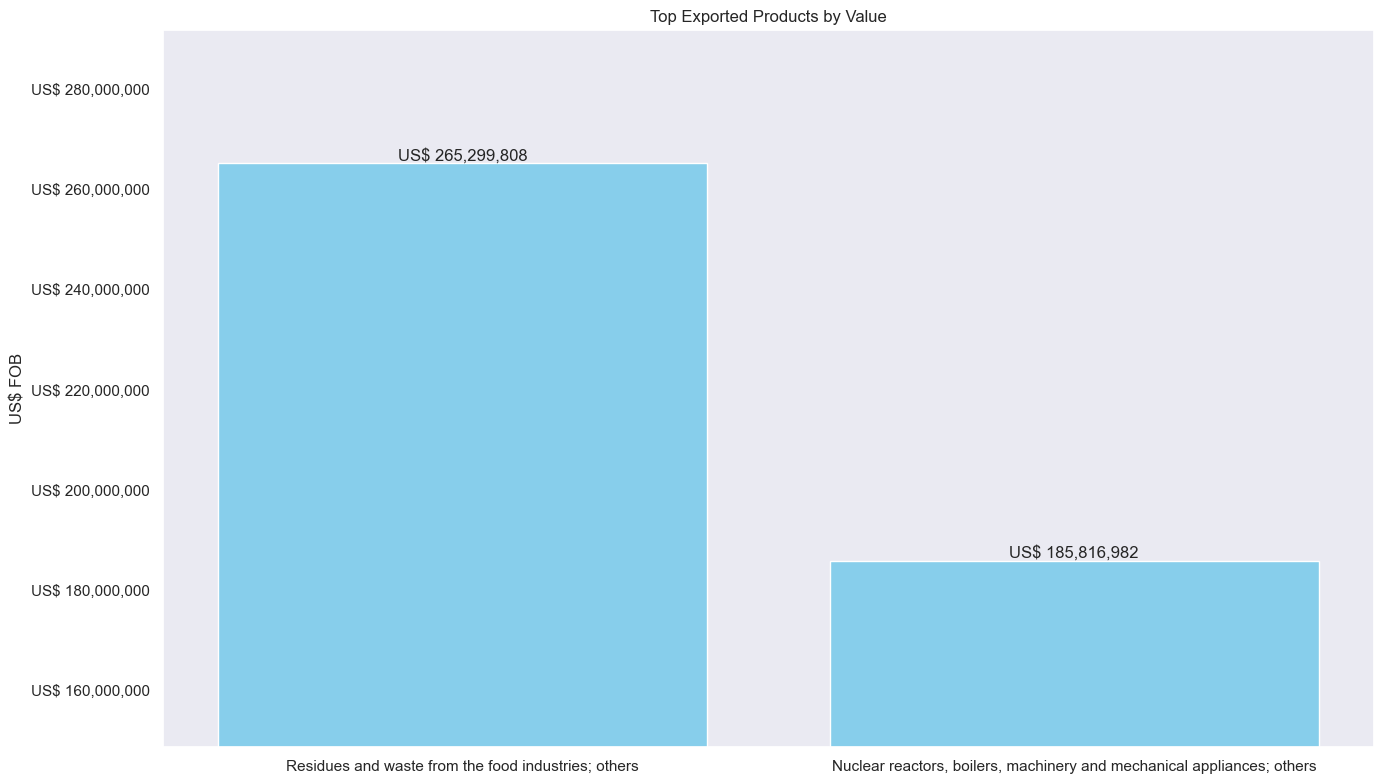

In [16]:
# Plotando o gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(most_exported_products_2020['SH2 Description'], most_exported_products_2020['US$ FOB'], color='skyblue')

# Adicionando rótulos e título
plt.xlabel('SH2 Description')
plt.ylabel('US$ FOB')
plt.title('Top Exported Products by Value')

# Formatando os valores do eixo y com vírgulas
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'US$ {x:,.0f}'))

y_max = most_exported_products_2020['US$ FOB'].max() * 1.1
x_max = most_exported_products_2020['US$ FOB'].min() * 0.8
plt.ylim(x_max, y_max)

plt.xlabel('')

# Adicionando rótulos de valores formatados nas barras
for bar, value in zip(bars, most_exported_products_2020['US$ FOB']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'US$ {value:,.0f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## Análise de importação por estado em 2020
Criei uma nova coluna chamada "Estado" a partir do valor dado pela coluna "City".
Após análise dos dados, podemos afirmar que:

1 - São paulo foi o estado que mais exportou, com: US$ 854,332,944;

2 - Minas Gerais ficou em segundo lugar, com: US$ 501,727,276;

3 - Rio de Janeiro em terceiro lugar, com: US$ 481,756,574;

4 - Alagoas foi o estado que menos exportou, com apenas: US$ 3,064;

### Análise São Paulo
Levando em consideração uma análise mais detalhada do estado de São Paulo, observamos que 'Aircraft, spacecraft, and parts' está em primeiro lugar de produtos exportados com US$ 250,573,746 e 'Nuclear reactors, boilers, machinery' está em segundo com: US$ 127,759,060
Se levarmos ainda em consideração apenas os 5 primeiros produtos exportados por são paulo, podemos observar que 'Aircraft, spacecraft, and parts' equivale a 45% e 'Nuclear reactors, boilers, machinery' a 23% to total Exportado (Em US$ e levando em consideração apenas os 5 primeiros produtos de SP).


In [19]:
df_2020.loc[:, 'Estado'] = df['City'].str.split(' - ').str[-1].str.strip()
df_2020.head()

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight,Estado
8482,2020,1,France,Abaetetuba - PA,2008,"Fruit, nuts and other edible parts of plants, otherwise prepared or preserved, whether or not containing added sugar or other sweetening matter or spirit, not elsewhere specified or included",20,"Preparations of vegetables, fruit, nuts or other parts of plants",Europe,42609,16560,PA
8483,2020,1,France,Abaetetuba - PA,2008,"Fruit, nuts and other edible parts of plants, otherwise prepared or preserved, whether or not containing added sugar or other sweetening matter or spirit, not elsewhere specified or included",20,"Preparations of vegetables, fruit, nuts or other parts of plants",European Union (EU),42609,16560,PA
8484,2020,1,France,Aguaí - SP,804,"Dates, figs, pineapples, avocados, guavas, mangoes and mangosteens, fresh or dried",8,Edible fruit and nuts; peel of citrus fruits or melons,Europe,2861,1728,SP
8485,2020,1,France,Aguaí - SP,804,"Dates, figs, pineapples, avocados, guavas, mangoes and mangosteens, fresh or dried",8,Edible fruit and nuts; peel of citrus fruits or melons,European Union (EU),2861,1728,SP
8486,2020,1,France,Albertina - MG,901,"Coffee, whether or not roasted or decaffeinated; coffee husks and skins; coffee substitutes containing coffee in any proportion",9,"Coffee, tea, maté and spices",Europe,345513,151200,MG


In [20]:
analise_por_estado_df = df_2020.groupby('Estado')['US$ FOB'].sum().reset_index()
analise_por_estado_df['US$ FOB Formatado'] = analise_por_estado_df['US$ FOB'].map('US$ {:,}'.format)
analise_por_estado_df = analise_por_estado_df.sort_values(by='US$ FOB', ascending=False)

display(analise_por_estado_df)

,Estado,US$ FOB,US$ FOB Formatado
24,SP,854332944,"US$ 854,332,944"
10,MG,501727276,"US$ 501,727,276"
18,RJ,481756574,"US$ 481,756,574"
17,PR,428293154,"US$ 428,293,154"
4,BA,358387118,"US$ 358,387,118"
21,RS,321670010,"US$ 321,670,010"
13,PA,281012980,"US$ 281,012,980"
12,MT,197489894,"US$ 197,489,894"
8,GO,120878042,"US$ 120,878,042"
22,SC,114707768,"US$ 114,707,768"


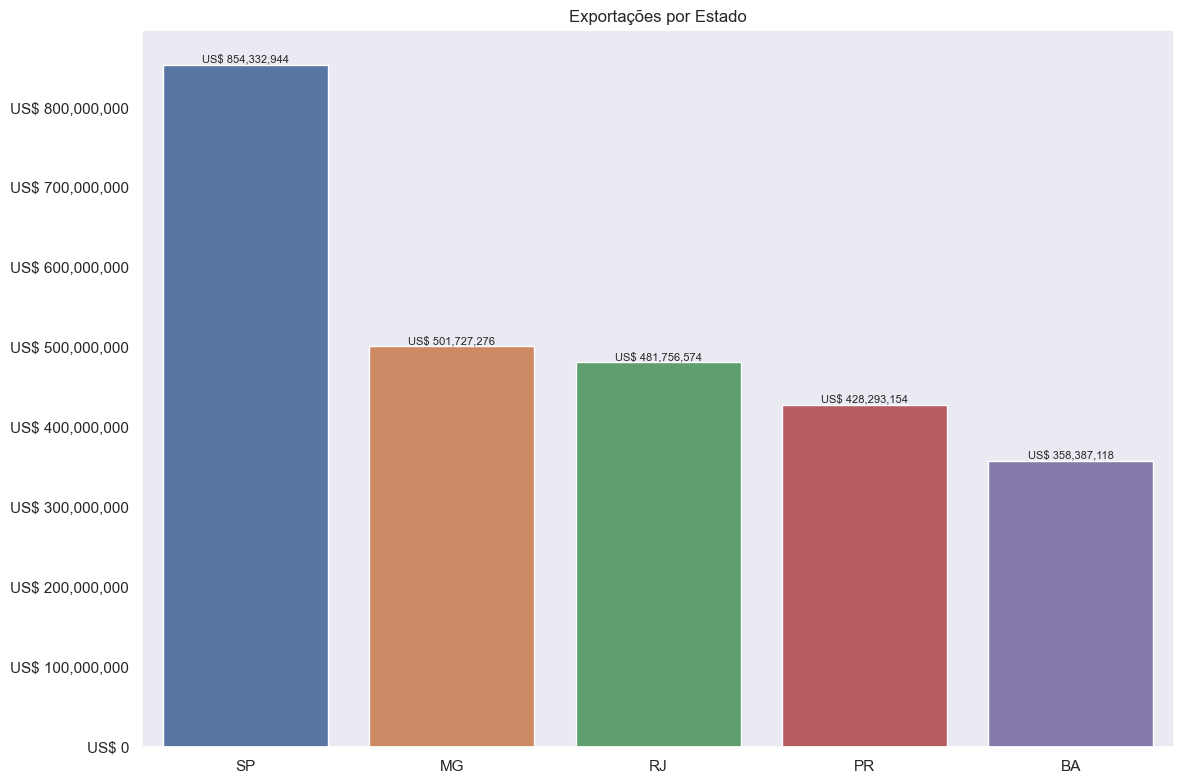

In [21]:
analise_por_estado_df = analise_por_estado_df.head(5)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Estado', y='US$ FOB', data=analise_por_estado_df, hue='Estado' , palette='deep');

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'US$ {x:,.0f}'))

# Adicionando rótulos de valores formatados nas barras
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'US$ {yval:,.0f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('')
plt.ylabel('')
plt.title('Exportações por Estado')
plt.tight_layout()
plt.show()


,SH2 Description,US$ FOB,US$ FOB Formatado
0,"Aircraft, spacecraft, and parts thereof",250573746,"US$ 250,573,746"
52,"Nuclear reactors, boilers, machinery and mechanical appliances; others",127759060,"US$ 127,759,060"
71,Residues and waste from the food industries; others,78464588,"US$ 78,464,588"
61,Pharmaceutical products,56499122,"US$ 56,499,122"
24,Electrical machinery and equipment and parts thereof; others,43359630,"US$ 43,359,630"


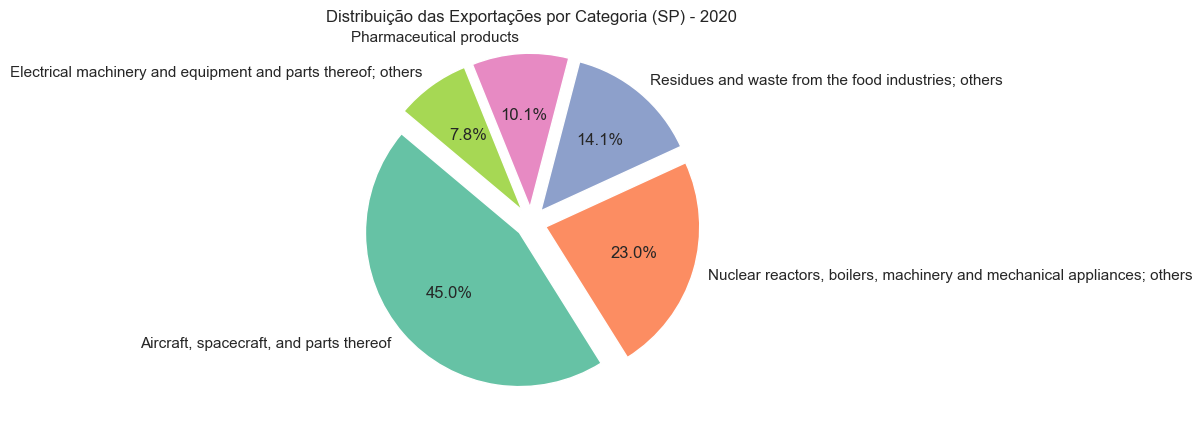

In [22]:
df_2020_SP = df_2020.loc[df_2020['Estado'] == 'SP']
df_2020_SP_exports = df_2020_SP.groupby('SH2 Description')['US$ FOB'].sum().reset_index()
df_2020_SP_exports['US$ FOB Formatado'] = df_2020_SP_exports['US$ FOB'].map('US$ {:,}'.format)
df_2020_SP_exports = df_2020_SP_exports.sort_values(by='US$ FOB', ascending=False)
df_2020_SP_exports = df_2020_SP_exports.head(5)
display(df_2020_SP_exports);

# Define os dados para o gráfico
labels = df_2020_SP_exports['SH2 Description']
sizes = df_2020_SP_exports['US$ FOB']
explode = [0.1] * len(labels)  # Destaque para todas as fatias

# Cria o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Set2').colors)

# Adiciona o título
plt.title('Distribuição das Exportações por Categoria (SP) - 2020')

# Mostra o gráfico
plt.tight_layout()
plt.show()